# Saildrone Plotter

In [4]:
ddir = '~/shared/users/mgarciareyes/saildrone_data/'
fn = 'saildrone_arctic_2017_sd1003_JPLv5.0_8dy_20210613norep_20210613_20211116.nc'

In [2]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.simplefilter('ignore') 

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [5]:
#open .nc file with Saildrone Data
sail = xr.open_dataset(ddir + fn) 
sail.close()

#copy data for calculations versus graphing
sail_raw = sail.copy()

sail

<xarray.Dataset>
Dimensions:                       (time: 535)
Coordinates:
    trajectory                    object ...
  * time                          (time) datetime64[ns] 2017-07-18T04:43:30 ....
    ob                            (time) int64 ...
Data variables: (12/41)
    lon                           (time) float64 ...
    lat                           (time) float64 ...
    RH_MEAN                       (time) float64 ...
    BARO_PRES_MEAN                (time) float64 ...
    UWND_MEAN                     (time) float64 ...
    TEMP_AIR_MEAN                 (time) float64 ...
    ...                            ...
    sat_lon                       (time) float64 ...
    dist_land                     (time) float64 ...
    analysed_sst                  (time) float64 ...
    analysis_error                (time) float64 ...
    mask                          (time) float64 ...
    sea_ice_fraction              (time) float64 ...
Attributes: (12/34)
    cdm_data_type:             Trajectory
    cdm_trajectory_variables:  trajectory
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@saildrone.com
    creator_name:              SailDrone
    creator_url:               http://saildrone.com/
    ...                        ...
    summary:                   Saildrone 2017 data
    time_coverage_end:         2017-09-29T21:00:00Z
    time_coverage_start:       2017-07-17T00:00:00Z
    title:                     Saildrone Arctic 2017 data
    Westernmost_Easting:       -169.5898368
    vehicle_id:                sd1003

### Plotting a Course

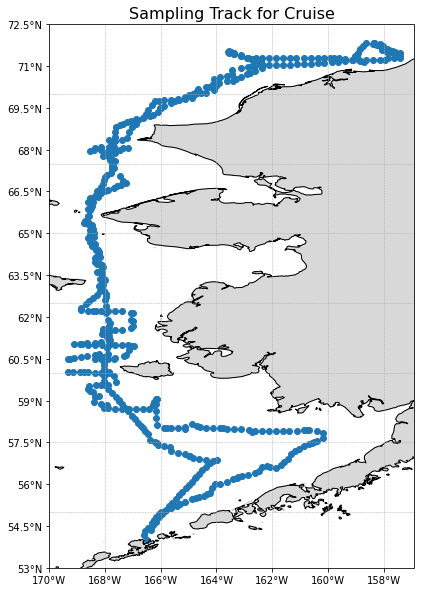

In [9]:
#define latitude and longitude boundaries
latr = [min(sail['lat']), max(sail['lat'])] 
lonr = [max(sail['lon']), min(sail['lon'])] 

# Select a region of our data, giving it a margin
margin = 0.5 
region = np.array([[latr[0]-margin,latr[1]+margin],[lonr[0]+margin,lonr[1]-margin]]) 

#add state outlines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Create and set the figure context
fig = plt.figure(figsize=(16,10), dpi = 72) 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m',linewidth=1,color='black') 
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS)
ax.set_extent([region[1,0],region[1,1],region[0,0],region[0,1]],crs=ccrs.PlateCarree()) 
ax.set_xticks(np.round([*np.arange(region[1,1],region[1,0]+1,2)][::-1],0), crs=ccrs.PlateCarree()) 
ax.set_yticks(np.round([*np.arange(np.floor(region[0,0]),region[0,1]+1,1.5)],1), crs=ccrs.PlateCarree()) 
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

# Plot track data
sc = plt.scatter(x = sail['lon'], y = sail['lat'], cmap='jet')
#plt.plot(sail['lon'], sail['lat'], ls = ':', c = 'navy', alpha = 0.4)
plt.title('Sampling Track for Cruise', fontdict = {'fontsize' : 16})
plt.show()

### Plotting a Variable

In [19]:
vname = 'sat_smap_sss'

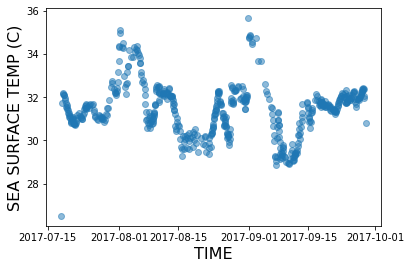

In [25]:
plt.figure() # dpi = 300
plt.scatter(x = sail.time, y = sail[vname], alpha = 0.5)
plt.xlabel('TIME', fontSize=16)
plt.ylabel('SEA SURFACE TEMP (C)', fontSize=16)
plt.show()


# Plotting 2 Variables (Actually 3 for positional avg)

In [28]:
v1 = 'sat_smap_sss'
v2 = 'sat_smap_spd'

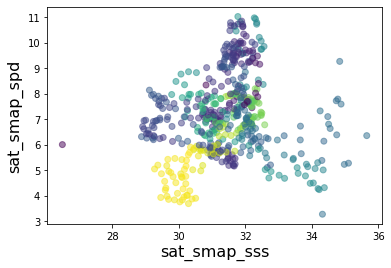

In [35]:
plt.figure() # dpi = 300
plt.scatter(x = sail[v1], y = sail[v2], c=((sail['lat']+sail['lon'])/2), alpha = 0.5)
plt.xlabel(v1, fontSize=16)
plt.ylabel(v2, fontSize=16)
plt.show()


# Mur SST data for March 30 (my birthday)

In [37]:
file_location = 'https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1'

ds_sst = xr.open_zarr(file_location,consolidated=True) # open a zarr file using xarray

ds_sst # we can treat it as a dataset!

,Array,Chunk
Bytes,16.70 TB,129.53 MB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,16.70 TB,129.53 MB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray


In [ ]:
ds_sst.to_netcdf('sst_example.nc') # saving the data, incase we want to come back to analyze the same data, but don't want to acquire it again from the cloud.

In [ ]:
sst = xr.open_dataset('sst_example.nc') 
sst.close()
sst.analysed_sst.values